In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


In [44]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #Loading the data of handwritten letters and  every pixel in range 0-255[3d matrics]

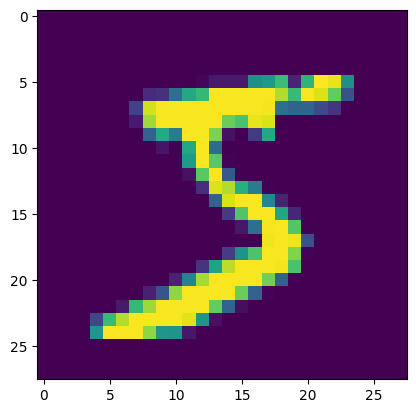

In [45]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [46]:
#Make Range Between 0-1
X_train = X_train/255
X_test = X_test/255

In [47]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [48]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))  #first layer
model.add(Dense(10, activation='softmax')) #second layer

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy']) #It will import labels automatically 0-9 and using loss function as advised
history = model.fit(X_train, y_train, epochs=10,validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.1436 - val_accuracy: 0.9788
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.1442 - val_accuracy: 0.9762
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.1400 - val_accuracy: 0.9780
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1742 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.1499 - val_accuracy: 0.9761
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.1471 - val_accuracy: 0.9781
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1707 - val_accuracy:

In [73]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [76]:
y_pred = y_prob.argmax(axis=1)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #97% accuracy increasing number of ephocs causing the overfitting reducing accuracy

0.9786

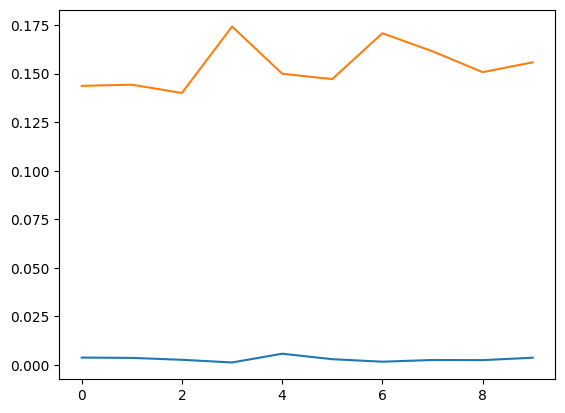

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [87]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

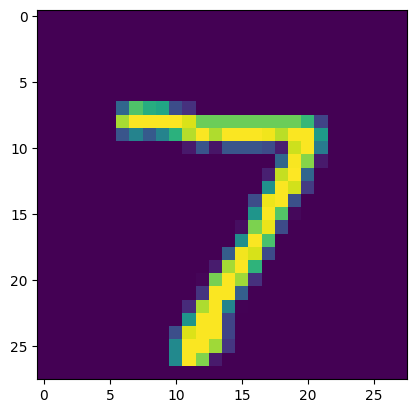

In [88]:
plt.imshow(X_test[0])